In [106]:
# Import libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.transforms as transforms
import seaborn as sns
%matplotlib inline

# Set up seaborn for plots:
sns.set()
sns.set_style('white')

In [107]:
# Read in the excel file:
df = pd.read_excel("ANZ synthesised transaction dataset.xlsx")
df.head(20)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit
5,posted,NaN,NaN,ACC-1608363396,AUD,151.22 -33.87,PAYMENT,NaN,NaN,Robert,...,20,NaN,NaN,2018-08-01T02:00:00.000+0000,163.00,1005b48a6eda4ffd85e9b649dc9467d3,Australia,CUS-2688605418,NaN,debit
6,authorized,1.0,NaN,ACC-2776252858,AUD,144.95 -37.76,SALES-POS,3aa18033-a0a9-4190-a117-b7caaf4d07e3,NaN,Kristin,...,43,Kalkallo,VIC,2018-08-01T02:23:04.000+0000,61.06,b79ca208099c4c28aa5dae966096d842,Australia,CUS-4123612273,144.95 -37.53,debit
7,authorized,1.0,NaN,ACC-2776252858,AUD,144.95 -37.76,POS,ee58145d-26e8-4b01-9cd9-62378014f21d,NaN,Kristin,...,43,Melbourne,VIC,2018-08-01T04:11:25.000+0000,15.61,e1c4a50d6a0549cbb3710a62a2fa00d5,Australia,CUS-4123612273,144.96 -37.81,debit
8,authorized,1.0,NaN,ACC-182446574,AUD,116.06 -32.00,POS,cfbf535e-caa8-499f-9d41-bbdc2b836d85,NaN,Tonya,...,27,Yokine,WA,2018-08-01T04:40:00.000+0000,19.25,799e39eb2c1b411185424b0f2cd18bda,Australia,CUS-3026014945,115.85 -31.9,debit
9,posted,NaN,NaN,ACC-602667573,AUD,151.23 -33.96,INTER BANK,NaN,NaN,Michael,...,40,NaN,NaN,2018-08-01T06:00:00.000+0000,21.00,798a77869014441b840a7a8a23408332,Australia,CUS-2031327464,NaN,debit


In [108]:
df.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [110]:
#verifying number of unique accounts
df["account"].nunique()

100

In [111]:
print('Data type of each column of Dataframe :')
print(df.dtypes)

Data type of each column of Dataframe :
status                       object
card_present_flag           float64
bpay_biller_code             object
account                      object
currency                     object
long_lat                     object
txn_description              object
merchant_id                  object
merchant_code               float64
first_name                   object
balance                     float64
date                 datetime64[ns]
gender                       object
age                           int64
merchant_suburb              object
merchant_state               object
extraction                   object
amount                      float64
transaction_id               object
country                      object
customer_id                  object
merchant_long_lat            object
movement                     object
dtype: object


In [112]:
#statistical description of continuous variables.
df.describe() 

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [113]:
#checking for total null values
df.isnull().sum() 

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

The dataset contains 12043 rows of transactions of 100 unique customers. For each row, innformation is complete for most of the columns, with the exception of `'card_present_flag', bpay_biller_code, merchant_id, merchant_code, merchant_suburb, merchant_state, and 'merchant_long_lat'`. This is likely due to the type of transaction where not every transaction is involved with a merchants (such as PAY/SALARY).

Some of the columns can be dropped as they will not be very useful for our analysis or contain too many NaN values.

In [114]:
df = df.drop(['bpay_biller_code','merchant_id', 'transaction_id', 'merchant_code', 'currency', 'country', 'first_name'], axis=1)
df

,status,card_present_flag,account,long_lat,txn_description,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,customer_id,merchant_long_lat,movement
0,authorized,1.0,ACC-1598451071,153.41 -27.95,POS,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,ACC-1598451071,153.41 -27.95,SALES-POS,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,ACC-1222300524,151.23 -33.94,POS,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,ACC-1037050564,153.10 -27.66,SALES-POS,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,ACC-1598451071,153.41 -27.95,SALES-POS,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,CUS-2487424745,153.44 -28.06,debit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,ACC-3021093232,149.83 -29.47,POS,14054.14,2018-10-31,F,30,Ringwood,VIC,2018-10-31T23:09:06.000+0000,9.79,CUS-55310383,145.23 -37.81,debit
12039,authorized,1.0,ACC-1608363396,151.22 -33.87,SALES-POS,9137.79,2018-10-31,M,20,Casula,NSW,2018-10-31T23:21:46.000+0000,63.87,CUS-2688605418,150.88 -33.96,debit
12040,authorized,1.0,ACC-3827517394,151.12 -33.89,POS,45394.57,2018-10-31,M,28,Kings Park,NSW,2018-10-31T23:34:25.000+0000,43.96,CUS-2663907001,150.92 -33.74,debit
12041,authorized,1.0,ACC-2920611728,144.96 -37.76,SALES-POS,11350.67,2018-10-31,M,69,Oakleigh,VIC,2018-10-31T23:47:05.000+0000,30.77,CUS-1388323263,145.09 -37.91,debit


The `extraction` column currently contains datetime objects in a Year-Month-Day concatenated with Hour-Minute-Seconds which is joined to a time-offset +0000. Since the time-offsets are always the same for all customers the the 'fractional' seconds are all the same for all customers, we can safely pull out only the hours, minutes and seconds from the extraction datetimes.

In [115]:
import datetime

# Pull out the extraction column as a temporary list:
extract_tmp = list(df['extraction'])
new_extract = []
extract_tmp_new = []

# Now, extract all elements of the datetime:
for dt_obj in extract_tmp:
    dt_obj_tmp = datetime.datetime.strptime(dt_obj, "%Y-%m-%dT%H:%M:%S.000+0000")
    new_extract.append(dt_obj_tmp)

# Then, for each element in new_extract, convert to a more human-readable datetime:
for dt_obj in new_extract:
    tmp = datetime.datetime.strftime(dt_obj, "%Y-%m-%d %H:%M:%S")
    extract_tmp_new.append(tmp)

df['extraction_dt'] = pd.Series(extract_tmp_new)

In [116]:
df = df.drop('extraction', axis=1)
df

,status,card_present_flag,account,long_lat,txn_description,balance,date,gender,age,merchant_suburb,merchant_state,amount,customer_id,merchant_long_lat,movement,extraction_dt
0,authorized,1.0,ACC-1598451071,153.41 -27.95,POS,35.39,2018-08-01,F,26,Ashmore,QLD,16.25,CUS-2487424745,153.38 -27.99,debit,2018-08-01 01:01:15
1,authorized,0.0,ACC-1598451071,153.41 -27.95,SALES-POS,21.20,2018-08-01,F,26,Sydney,NSW,14.19,CUS-2487424745,151.21 -33.87,debit,2018-08-01 01:13:45
2,authorized,1.0,ACC-1222300524,151.23 -33.94,POS,5.71,2018-08-01,M,38,Sydney,NSW,6.42,CUS-2142601169,151.21 -33.87,debit,2018-08-01 01:26:15
3,authorized,1.0,ACC-1037050564,153.10 -27.66,SALES-POS,2117.22,2018-08-01,F,40,Buderim,QLD,40.90,CUS-1614226872,153.05 -26.68,debit,2018-08-01 01:38:45
4,authorized,1.0,ACC-1598451071,153.41 -27.95,SALES-POS,17.95,2018-08-01,F,26,Mermaid Beach,QLD,3.25,CUS-2487424745,153.44 -28.06,debit,2018-08-01 01:51:15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,ACC-3021093232,149.83 -29.47,POS,14054.14,2018-10-31,F,30,Ringwood,VIC,9.79,CUS-55310383,145.23 -37.81,debit,2018-10-31 23:09:06
12039,authorized,1.0,ACC-1608363396,151.22 -33.87,SALES-POS,9137.79,2018-10-31,M,20,Casula,NSW,63.87,CUS-2688605418,150.88 -33.96,debit,2018-10-31 23:21:46
12040,authorized,1.0,ACC-3827517394,151.12 -33.89,POS,45394.57,2018-10-31,M,28,Kings Park,NSW,43.96,CUS-2663907001,150.92 -33.74,debit,2018-10-31 23:34:25
12041,authorized,1.0,ACC-2920611728,144.96 -37.76,SALES-POS,11350.67,2018-10-31,M,69,Oakleigh,VIC,30.77,CUS-1388323263,145.09 -37.91,debit,2018-10-31 23:47:05


In [117]:
df['date'] =df['date'].astype(str)
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d' )

#creating month column
df["month"] = df['date'].dt.month

#creating day of week column
df['day_of_week'] = df['date'].dt.day_name()

In [118]:
df

,status,card_present_flag,account,long_lat,txn_description,balance,date,gender,age,merchant_suburb,merchant_state,amount,customer_id,merchant_long_lat,movement,extraction_dt,month,day_of_week
0,authorized,1.0,ACC-1598451071,153.41 -27.95,POS,35.39,2018-08-01,F,26,Ashmore,QLD,16.25,CUS-2487424745,153.38 -27.99,debit,2018-08-01 01:01:15,8,Wednesday
1,authorized,0.0,ACC-1598451071,153.41 -27.95,SALES-POS,21.20,2018-08-01,F,26,Sydney,NSW,14.19,CUS-2487424745,151.21 -33.87,debit,2018-08-01 01:13:45,8,Wednesday
2,authorized,1.0,ACC-1222300524,151.23 -33.94,POS,5.71,2018-08-01,M,38,Sydney,NSW,6.42,CUS-2142601169,151.21 -33.87,debit,2018-08-01 01:26:15,8,Wednesday
3,authorized,1.0,ACC-1037050564,153.10 -27.66,SALES-POS,2117.22,2018-08-01,F,40,Buderim,QLD,40.90,CUS-1614226872,153.05 -26.68,debit,2018-08-01 01:38:45,8,Wednesday
4,authorized,1.0,ACC-1598451071,153.41 -27.95,SALES-POS,17.95,2018-08-01,F,26,Mermaid Beach,QLD,3.25,CUS-2487424745,153.44 -28.06,debit,2018-08-01 01:51:15,8,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,ACC-3021093232,149.83 -29.47,POS,14054.14,2018-10-31,F,30,Ringwood,VIC,9.79,CUS-55310383,145.23 -37.81,debit,2018-10-31 23:09:06,10,Wednesday
12039,authorized,1.0,ACC-1608363396,151.22 -33.87,SALES-POS,9137.79,2018-10-31,M,20,Casula,NSW,63.87,CUS-2688605418,150.88 -33.96,debit,2018-10-31 23:21:46,10,Wednesday
12040,authorized,1.0,ACC-3827517394,151.12 -33.89,POS,45394.57,2018-10-31,M,28,Kings Park,NSW,43.96,CUS-2663907001,150.92 -33.74,debit,2018-10-31 23:34:25,10,Wednesday
12041,authorized,1.0,ACC-2920611728,144.96 -37.76,SALES-POS,11350.67,2018-10-31,M,69,Oakleigh,VIC,30.77,CUS-1388323263,145.09 -37.91,debit,2018-10-31 23:47:05,10,Wednesday


At the moment, the latitude and longitude of the customers and the merchants are concatenated as one string object under their respectively columns. Conventionally, the latitudes and longitudes are separated into their own individual columns. For both ```long_lat``` and ```merchant_long_lat```, the latitude and longitude coordinates are split by a single whitespace. We can use the whitespace to attain the latitude and longitude, append to their individual lists and then form them into pandas series which we can then append onto the dataframe.

In [119]:
# Pull the long and lat columns from the dataframe
long_lat = df['long_lat']
merchant_long_lat = df['merchant_long_lat'].fillna('0 0')

# Create lists to store the long and lat coordinates:
long = []
lat = []
merchant_long = []
merchant_lat = []

# Using a for-loop, cycle through the long_lat list and extract the long and lat coords. Append to the appropriate list
for coord in long_lat:
    tmp = coord.split() # Split coords at white space. 'tmp' contains two elements
    long.append(tmp[0])
    lat.append(tmp[1])
    
# Do the same thing for the merchant's long-lat:
for coord in merchant_long_lat:
    tmp = coord.split()
    merchant_long.append(tmp[0])
    merchant_lat.append(tmp[1])
    
# Final step, convert all the long and lat lists into pandas series and append to the original dataframe:
long = pd.Series(long)
lat = pd.Series(lat)
merchant_long = pd.Series(merchant_long)
merchant_lat = pd.Series(merchant_lat)

# Hence...
df['long'] = long
df['lat'] = lat
df['merchant_long'] = merchant_long
df['merchant_lat'] = merchant_lat

In [120]:
df

,status,card_present_flag,account,long_lat,txn_description,balance,date,gender,age,merchant_suburb,...,customer_id,merchant_long_lat,movement,extraction_dt,month,day_of_week,long,lat,merchant_long,merchant_lat
0,authorized,1.0,ACC-1598451071,153.41 -27.95,POS,35.39,2018-08-01,F,26,Ashmore,...,CUS-2487424745,153.38 -27.99,debit,2018-08-01 01:01:15,8,Wednesday,153.41,-27.95,153.38,-27.99
1,authorized,0.0,ACC-1598451071,153.41 -27.95,SALES-POS,21.20,2018-08-01,F,26,Sydney,...,CUS-2487424745,151.21 -33.87,debit,2018-08-01 01:13:45,8,Wednesday,153.41,-27.95,151.21,-33.87
2,authorized,1.0,ACC-1222300524,151.23 -33.94,POS,5.71,2018-08-01,M,38,Sydney,...,CUS-2142601169,151.21 -33.87,debit,2018-08-01 01:26:15,8,Wednesday,151.23,-33.94,151.21,-33.87
3,authorized,1.0,ACC-1037050564,153.10 -27.66,SALES-POS,2117.22,2018-08-01,F,40,Buderim,...,CUS-1614226872,153.05 -26.68,debit,2018-08-01 01:38:45,8,Wednesday,153.10,-27.66,153.05,-26.68
4,authorized,1.0,ACC-1598451071,153.41 -27.95,SALES-POS,17.95,2018-08-01,F,26,Mermaid Beach,...,CUS-2487424745,153.44 -28.06,debit,2018-08-01 01:51:15,8,Wednesday,153.41,-27.95,153.44,-28.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,ACC-3021093232,149.83 -29.47,POS,14054.14,2018-10-31,F,30,Ringwood,...,CUS-55310383,145.23 -37.81,debit,2018-10-31 23:09:06,10,Wednesday,149.83,-29.47,145.23,-37.81
12039,authorized,1.0,ACC-1608363396,151.22 -33.87,SALES-POS,9137.79,2018-10-31,M,20,Casula,...,CUS-2688605418,150.88 -33.96,debit,2018-10-31 23:21:46,10,Wednesday,151.22,-33.87,150.88,-33.96
12040,authorized,1.0,ACC-3827517394,151.12 -33.89,POS,45394.57,2018-10-31,M,28,Kings Park,...,CUS-2663907001,150.92 -33.74,debit,2018-10-31 23:34:25,10,Wednesday,151.12,-33.89,150.92,-33.74
12041,authorized,1.0,ACC-2920611728,144.96 -37.76,SALES-POS,11350.67,2018-10-31,M,69,Oakleigh,...,CUS-1388323263,145.09 -37.91,debit,2018-10-31 23:47:05,10,Wednesday,144.96,-37.76,145.09,-37.91


In [121]:
rearrange_cols = ['status', 'card_present_flag', 'account', 'long', 'lat', 'txn_description',
       'balance', 'date','month','day_of_week', 'extraction_dt', 'gender', 'age', 'merchant_suburb',
       'merchant_state', 'amount', 'customer_id', 'merchant_long', 'merchant_lat',
       'movement']

df[rearrange_cols]

,status,card_present_flag,account,long,lat,txn_description,balance,date,month,day_of_week,extraction_dt,gender,age,merchant_suburb,merchant_state,amount,customer_id,merchant_long,merchant_lat,movement
0,authorized,1.0,ACC-1598451071,153.41,-27.95,POS,35.39,2018-08-01,8,Wednesday,2018-08-01 01:01:15,F,26,Ashmore,QLD,16.25,CUS-2487424745,153.38,-27.99,debit
1,authorized,0.0,ACC-1598451071,153.41,-27.95,SALES-POS,21.20,2018-08-01,8,Wednesday,2018-08-01 01:13:45,F,26,Sydney,NSW,14.19,CUS-2487424745,151.21,-33.87,debit
2,authorized,1.0,ACC-1222300524,151.23,-33.94,POS,5.71,2018-08-01,8,Wednesday,2018-08-01 01:26:15,M,38,Sydney,NSW,6.42,CUS-2142601169,151.21,-33.87,debit
3,authorized,1.0,ACC-1037050564,153.10,-27.66,SALES-POS,2117.22,2018-08-01,8,Wednesday,2018-08-01 01:38:45,F,40,Buderim,QLD,40.90,CUS-1614226872,153.05,-26.68,debit
4,authorized,1.0,ACC-1598451071,153.41,-27.95,SALES-POS,17.95,2018-08-01,8,Wednesday,2018-08-01 01:51:15,F,26,Mermaid Beach,QLD,3.25,CUS-2487424745,153.44,-28.06,debit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,ACC-3021093232,149.83,-29.47,POS,14054.14,2018-10-31,10,Wednesday,2018-10-31 23:09:06,F,30,Ringwood,VIC,9.79,CUS-55310383,145.23,-37.81,debit
12039,authorized,1.0,ACC-1608363396,151.22,-33.87,SALES-POS,9137.79,2018-10-31,10,Wednesday,2018-10-31 23:21:46,M,20,Casula,NSW,63.87,CUS-2688605418,150.88,-33.96,debit
12040,authorized,1.0,ACC-3827517394,151.12,-33.89,POS,45394.57,2018-10-31,10,Wednesday,2018-10-31 23:34:25,M,28,Kings Park,NSW,43.96,CUS-2663907001,150.92,-33.74,debit
12041,authorized,1.0,ACC-2920611728,144.96,-37.76,SALES-POS,11350.67,2018-10-31,10,Wednesday,2018-10-31 23:47:05,M,69,Oakleigh,VIC,30.77,CUS-1388323263,145.09,-37.91,debit


In [122]:
df['card_present_flag'].value_counts(dropna=False)

1.0    6194
NaN    4326
0.0    1523
Name: card_present_flag, dtype: int64

We can see that a significant portion of the ```card_present_flag``` columns are ```NaN``` values. For this reason, we are safe to drop this column as well.

In [123]:
df = df.drop('card_present_flag', axis=1)

`merchant_state` and `merchant_suburb` columns contains the state with which the merchant is located at. However, we already have the latitude and longitude, so the state might not be necessary. Also, as we see below, there are a significant number of rows that do not have a specified state. In the same way, those entries also do not have a corresponding entry in the merchant_suburb column. Hence, we should be safe to drop these two columns.

In [124]:
df['merchant_state'].value_counts(dropna=False)

NaN    4326
NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64

In [125]:
df = df.drop(['merchant_state', 'merchant_suburb'], axis=1)
df.head()

,status,account,long_lat,txn_description,balance,date,gender,age,amount,customer_id,merchant_long_lat,movement,extraction_dt,month,day_of_week,long,lat,merchant_long,merchant_lat
0,authorized,ACC-1598451071,153.41 -27.95,POS,35.39,2018-08-01,F,26,16.25,CUS-2487424745,153.38 -27.99,debit,2018-08-01 01:01:15,8,Wednesday,153.41,-27.95,153.38,-27.99
1,authorized,ACC-1598451071,153.41 -27.95,SALES-POS,21.20,2018-08-01,F,26,14.19,CUS-2487424745,151.21 -33.87,debit,2018-08-01 01:13:45,8,Wednesday,153.41,-27.95,151.21,-33.87
2,authorized,ACC-1222300524,151.23 -33.94,POS,5.71,2018-08-01,M,38,6.42,CUS-2142601169,151.21 -33.87,debit,2018-08-01 01:26:15,8,Wednesday,151.23,-33.94,151.21,-33.87
3,authorized,ACC-1037050564,153.10 -27.66,SALES-POS,2117.22,2018-08-01,F,40,40.90,CUS-1614226872,153.05 -26.68,debit,2018-08-01 01:38:45,8,Wednesday,153.10,-27.66,153.05,-26.68
4,authorized,ACC-1598451071,153.41 -27.95,SALES-POS,17.95,2018-08-01,F,26,3.25,CUS-2487424745,153.44 -28.06,debit,2018-08-01 01:51:15,8,Wednesday,153.41,-27.95,153.44,-28.06


<h2>Basic Data Analysis</h2>

Now that the data is now much cleaner than what we started with, we are ready to begin some simple analysis on the data. Some of the basic questions to answer in this project are:

- What is the average transaction amount? 
- How many transactions do customers make each month, on average?
- Segment the dataset by transaction date and time and visualise transaction volume and spending over the course of an average day or week. 

In [126]:
mean_transaction = df['amount'].mean()
print("The mean transaction amount = ${}".format(round(mean_transaction, 2)))

The mean transaction amount = $187.93


In [127]:
# Statistics for the transaction amount:
df['amount'].describe()

count    12043.000000
mean       187.933588
std        592.599934
min          0.100000
25%         16.000000
50%         29.000000
75%         53.655000
max       8835.980000
Name: amount, dtype: float64

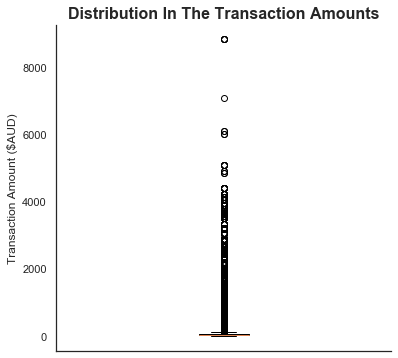

In [128]:
# Plotting the distribution in the transaction amounts:
fig, ax = plt.subplots(figsize=(6,6))
ax.set_title("Distribution In The Transaction Amounts", fontsize=16, fontweight='bold')
ax.set_ylabel("Transaction Amount ($AUD)")
ax.get_xaxis().set_visible(False)
ax.boxplot(df['amount'])
sns.despine()
plt.show()

In [130]:
#for each transaction type, find the average transaction amount

for transaction in df.txn_description.unique():
    print("Transaction Type: " + transaction)
    print("Average Transaction Amount: ", end= '')
    print(df[df['txn_description'] ==transaction].amount.mean())
    print("Average Number of Transactions: ", end = '')
    print(df[df['txn_description'] ==transaction].shape[0])

Transaction Type: POS
Average Transaction Amount: 40.407412106793586
Average Number of Transactions: 3783
Transaction Type: SALES-POS
Average Transaction Amount: 39.90978901881027
Average Number of Transactions: 3934
Transaction Type: PAYMENT
Average Transaction Amount: 77.61307692307692
Average Number of Transactions: 2600
Transaction Type: INTER BANK
Average Transaction Amount: 86.69946091644205
Average Number of Transactions: 742
Transaction Type: PAY/SALARY
Average Transaction Amount: 1898.7280294450716
Average Number of Transactions: 883
Transaction Type: PHONE BANK
Average Transaction Amount: 106.0990099009901
Average Number of Transactions: 101


Interesting Insight: Distribution of Transaction Purchase Amount

In [131]:
POS_data = df[df.txn_description.isin(['POS', 'SALES-POS'])]
POS_data.amount.describe()

count    7717.000000
mean       40.153732
std       149.833070
min         0.100000
25%        12.080000
50%        19.700000
75%        33.910000
max      7081.090000
Name: amount, dtype: float64

In [132]:
# #remove outliers
Q1 = POS_data.amount.quantile(0.25)
Q3 = POS_data.amount.quantile(0.75)
IQR = Q3 - Q1

POS_data_no_out = POS_data[~((POS_data.amount < (Q1 - 1.5 * IQR)) |(POS_data.amount > (Q3 + 1.5 * IQR)))]

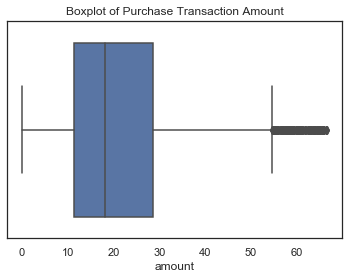

In [133]:
ax = sns.boxplot(x='amount', data = POS_data_no_out).set_title('Boxplot of Purchase Transaction Amount')

Text(0, 0.5, 'Frequency')

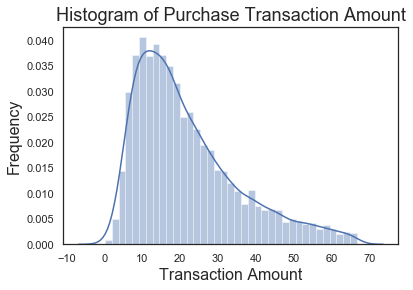

In [134]:
sns.distplot(POS_data_no_out.amount)
plt.title('Histogram of Purchase Transaction Amount', fontsize=18)
plt.xlabel('Transaction Amount', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

<h3>How Many Transactions Per Month?</h3>

The dataset accounts for transactions that occur between August 1st to October 31st. We need to partition the dataframe by the month and then compute the mean transaction amount made in each month.

In [135]:
# Filter all August transactions
tmp_bool = (df['date'] >= '2018-08-01') & (df['date'] <= '2018-08-31')
df_aug = df[tmp_bool]
aug_trans_mean = df_aug['amount'].mean()

# Filter all September transactions
tmp_bool2 = (df['date'] >= '2018-09-01') & (df['date'] <= '2018-09-30')
df_sep = df[tmp_bool2]
sep_trans_mean = df_sep['amount'].mean()

# Filter all October transactions
tmp_bool = (df['date'] >= '2018-10-01') & (df['date'] <= '2018-10-31')
df_oct = df[tmp_bool]
oct_trans_mean = df_oct['amount'].mean()

print("The mean transaction amount in August = ${}".format(round(aug_trans_mean, 2)))
print("The mean transaction amount in September = ${}".format(round(sep_trans_mean, 2)))
print("The mean transaction amount in October = ${}".format(round(oct_trans_mean, 2)))

The mean transaction amount in August = $185.12
The mean transaction amount in September = $182.05
The mean transaction amount in October = $196.43


We may want to visualise the spending made everyday in a particular month. To do this, we need to convert the month-based dataframes into pivot tables and sum all transactions made on a particular day (this computes the transaction volume per day). From here, we can then make a time-series graph to visualise the trend in transactions on a daily basis.

In [136]:
pt_aug = df_aug.pivot_table(index='date', values='amount', aggfunc=np.mean, fill_value=0)
pt_aug = pt_aug.reset_index()

pt_sep = df_sep.pivot_table(index='date', values='amount', aggfunc=np.mean, fill_value=0)
pt_sep = pt_sep.reset_index()

pt_oct = df_oct.pivot_table(index='date', values='amount', aggfunc=np.mean, fill_value=0)
pt_oct = pt_oct.reset_index()

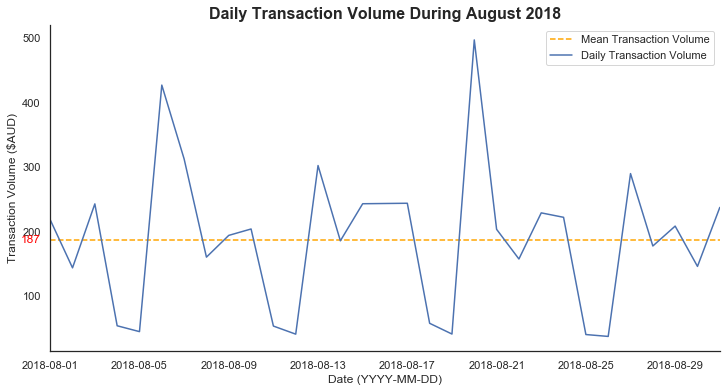

In [137]:
fig, ax = plt.subplots(figsize=(12,6))
ax.set_title("Daily Transaction Volume During August 2018", fontsize=16, fontweight='bold')
ax.set_ylabel('Transaction Volume ($AUD)')
ax.set_xlabel('Date (YYYY-MM-DD)')
ax.axhline(aug_trans_vol_mean, label='Mean Transaction Volume', color='orange', linestyle='--')

trans = transforms.blended_transform_factory(
    ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(0,aug_trans_vol_mean, "{:.0f}".format(aug_trans_vol_mean), color="red", transform=trans, 
        ha="right", va="center")

ax.plot(pt_aug['date'], pt_aug['amount'], label='Daily Transaction Volume')
ax.set_xlim([pt_aug['date'][0], pt_aug['date'][len(pt_aug)-1]])
ax.legend()
sns.despine()

plt.show()

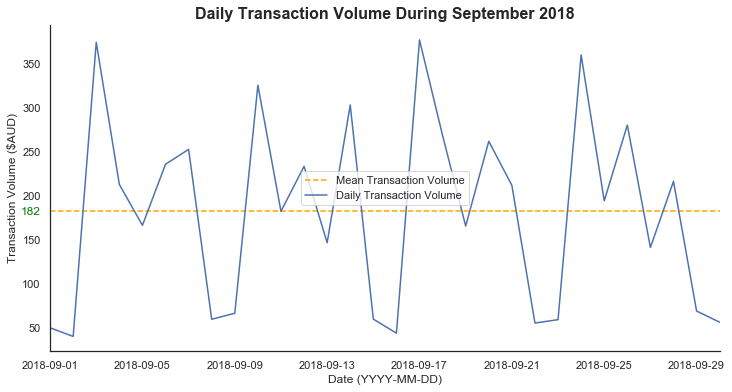

In [138]:
fig, ax= plt.subplots(figsize=(12,6))
ax.set_title("Daily Transaction Volume During September 2018", fontsize=16, fontweight='bold')
ax.set_ylabel('Transaction Volume ($AUD)')
ax.set_xlabel('Date (YYYY-MM-DD)')
ax.axhline(sep_trans_vol_mean, label='Mean Transaction Volume', color='orange', linestyle='--')

trans = transforms.blended_transform_factory(
    ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(0,sep_trans_vol_mean, "{:.0f}".format(sep_trans_vol_mean), color="green", transform=trans, 
        ha="right", va="center")

ax.plot(pt_sep['date'], pt_sep['amount'], label='Daily Transaction Volume')
ax.set_xlim([pt_sep['date'][0], pt_sep['date'][len(pt_sep)-1]])
plt.legend()
sns.despine()

plt.show()

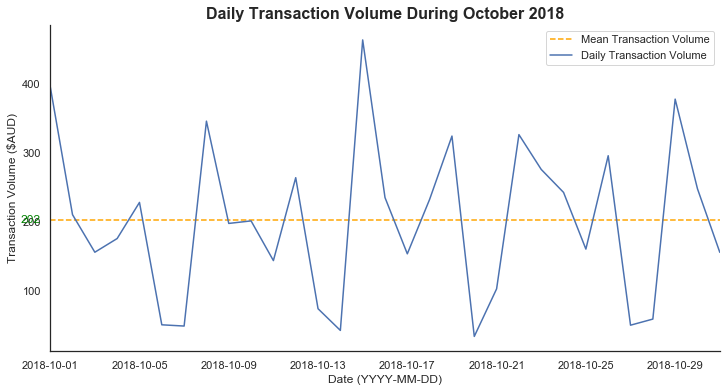

In [139]:
fig, ax = plt.subplots(figsize=(12,6))
ax.set_title("Daily Transaction Volume During October 2018", fontsize=16, fontweight='bold')
ax.set_ylabel('Transaction Volume ($AUD)')
ax.set_xlabel('Date (YYYY-MM-DD)')
ax.axhline(oct_trans_vol_mean, label='Mean Transaction Volume', color='orange', linestyle='--')

trans = transforms.blended_transform_factory(
    ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(0,oct_trans_vol_mean, "{:.0f}".format(oct_trans_vol_mean), color="green", transform=trans, 
        ha="right", va="center")

plt.plot(pt_oct['date'], pt_oct['amount'], label='Daily Transaction Volume')
ax.set_xlim([pt_oct['date'][0], pt_oct['date'][len(pt_oct)-1]])
plt.legend()
sns.despine()

plt.show()

Transaction Volume Throughout The Entire Duration

In [140]:
pt_whole = df.pivot_table(index='date', values='amount', aggfunc=np.mean, fill_value=0)
pt_whole = pt_whole.reset_index()
pt_whole.head(5)

,date,amount
0,2018-08-01,218.014161
1,2018-08-02,143.331053
2,2018-08-03,242.653376
3,2018-08-04,53.356356
4,2018-08-05,44.265000


In [141]:
mean_trans_vol_whole = pt_whole['amount'].mean()
print("Mean transaction volume for the whole duration = ${}".format(round(mean_trans_vol_whole,2)))

Mean transaction volume for the whole duration = $190.61


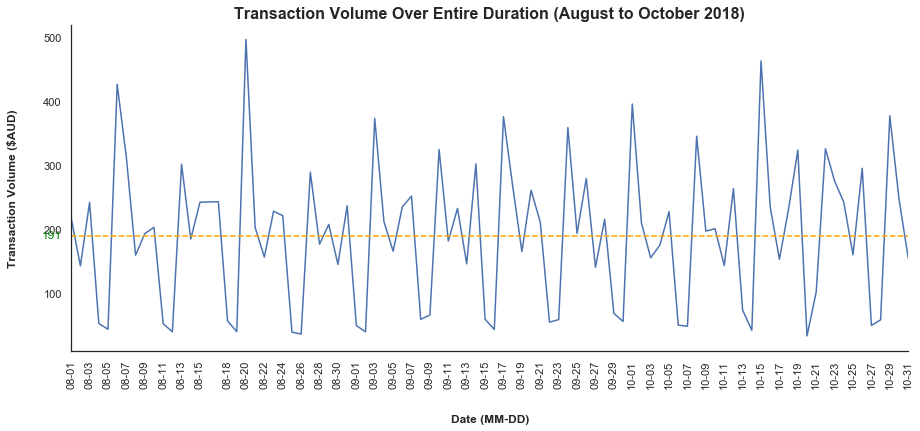

In [142]:
from datetime import timedelta
import matplotlib.dates as mdates
import matplotlib.transforms as transforms

min_x = pt_whole['date'][0]
max_x = pt_whole['date'][len(pt_whole) - 1]
        
fig, ax = plt.subplots(figsize=(15,6))
ax.plot(pt_whole['date'], pt_whole['amount'])
ax.axhline(mean_trans_vol_whole, linestyle='--', c='orange')
# ax.axhline(max(pt_whole['amount']), linestyle='--', c='orange')
# ax.axhline(min(pt_whole['amount']), linestyle='--', c='orange')

trans = transforms.blended_transform_factory(
    ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(0,mean_trans_vol_whole, "{:.0f}".format(mean_trans_vol_whole), color="green", transform=trans, 
        ha="right", va="center")

ax.set_xticklabels(pt_whole['date'], rotation=90)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

ax.set_title('Transaction Volume Over Entire Duration (August to October 2018)', fontsize=16, fontweight='bold')
ax.set_ylabel('Transaction Volume ($AUD)', fontweight='bold', labelpad=25)
ax.set_xlabel('Date (MM-DD)', fontweight='bold', labelpad=25)

ax.set_xticks(pt_whole['date'])
ax.set_xticks(ax.get_xticks()[::2])

ax.set_xlim([min(pt_whole['date']), max(pt_whole['date'])])

sns.despine()

plt.savefig('daily_whole_trans.svg', bbox_inches='tight', dpi=300, transparent=True)

plt.show()

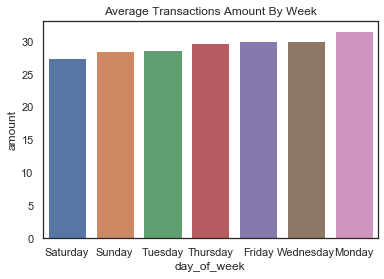

In [143]:
Q1 = df.amount.quantile(0.25)
Q3 = df.amount.quantile(0.75)
IQR = Q3 - Q1

df_no_out = df[~((df.amount < (Q1 - 1.5 * IQR)) |(df.amount > (Q3 + 1.5 * IQR)))]

average_day_mean = df_no_out.groupby(['day_of_week'], as_index=False).mean()
average_day_mean = average_day_mean.sort_values(by=['amount'])
ax = sns.barplot(x='day_of_week', y= 'amount', data= average_day_mean).set_title('Average Transactions Amount By Week')

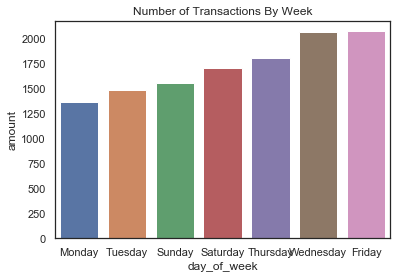

In [144]:
average_day_count = df.groupby(['day_of_week'], as_index=False).count()
average_day_count = average_day_count.sort_values(by=['amount'])
ax = sns.barplot(x='day_of_week', y= 'amount', data= average_day_count).set_title('Number of Transactions By Week')

Average Purchase Transaction By Age

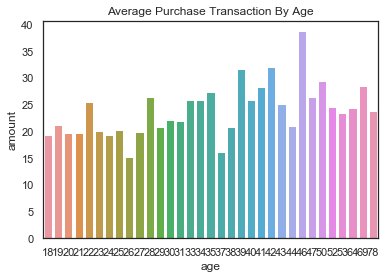

In [145]:
POS_data_by_age = POS_data_no_out.groupby(['age'], as_index=False).mean()
ax = sns.barplot(x="age", y="amount", data= POS_data_by_age).set_title('Average Purchase Transaction By Age')

Average Account Balance By Age

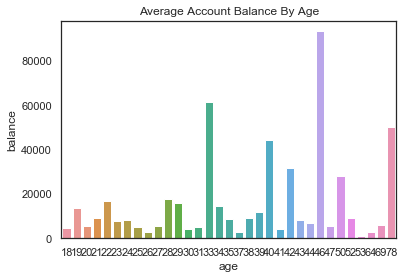

In [146]:
ax = sns.barplot(x="age", y="balance", data= POS_data_by_age).set_title('Average Account Balance By Age')

Number of Purchase Transactions By Age

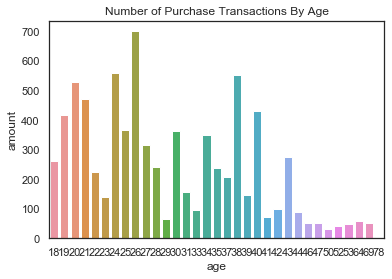

In [147]:
POS_data_count_by_age = POS_data.groupby(['age'], as_index=False).count()
ax = sns.barplot(x="age", y="amount", data= POS_data_count_by_age).set_title('Number of Purchase Transactions By Age')

Interesting Insight: Salary by Gender

In [148]:
salary_data = df[df.txn_description == 'PAY/SALARY']

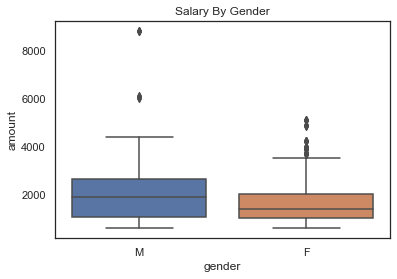

In [149]:
ax = sns.boxplot(x="gender", y='amount', data=salary_data).set_title('Salary By Gender')

Location Information

In [150]:
x = list(df['long'].astype(float))
y = list(df['lat'].astype(float))

x_m = list(df['merchant_long'].astype(float))
y_m = list(df['merchant_lat'].astype(float))

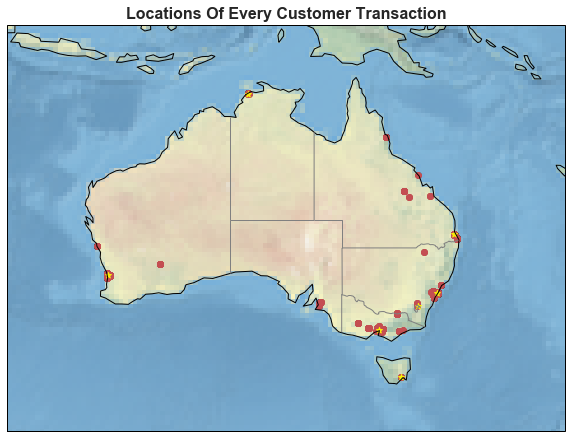

In [151]:
import cartopy.crs as ccrs
import cartopy.feature as cfeat

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())

ax.stock_img()

# Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
states_provinces = cfeat.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')

SOURCE = 'Natural Earth'
LICENSE = 'public domain'

ax.add_feature(cfeat.LAND)
ax.add_feature(cfeat.OCEAN)
ax.add_feature(cfeat.COASTLINE)
ax.add_feature(cfeat.RIVERS)
ax.add_feature(states_provinces, edgecolor='gray')

ax.set_extent([105, 165, -5, -45])

ax.set_title('Locations Of Every Customer Transaction', fontsize=16, fontweight='bold')
ax.scatter(x,y, c='r', s=25)
ax.scatter(151.2093, -33.8688, c='yellow', marker='*', s=40, alpha=0.85) # Sydney
ax.scatter(144.9631, -37.8136, c='yellow', marker='*', s=40, alpha=0.85) # Melbourne
ax.scatter(115.8605, -31.9505, c='yellow', marker='*', s=40, alpha=0.85) # Perth
ax.scatter(130.8456, -12.4634, c='yellow', marker='*', s=40, alpha=0.85) # Darwin
ax.scatter(153.0251, -27.4698, c='yellow', marker='*', s=40, alpha=0.85) # Brisbane
ax.scatter(147.3272, -42.8821, c='yellow', marker='*', s=40, alpha=0.85) # Hobart
ax.scatter(149.1300, -35.2809, c='yellow', marker='*', s=40, alpha=0.85) # Canberra

plt.savefig('cust_trans_loc.png', dpi=300, bbox_inches='tight', transparent=True)

plt.show()

Unsuprisingly, we can see that majority of transactions made by customers are concentrated at the main cities of each state. In this case, we can see a high density of transactions made in Sydney and Melbourne for example. All the main cities of each state have been indicated with a yellow star as a reference

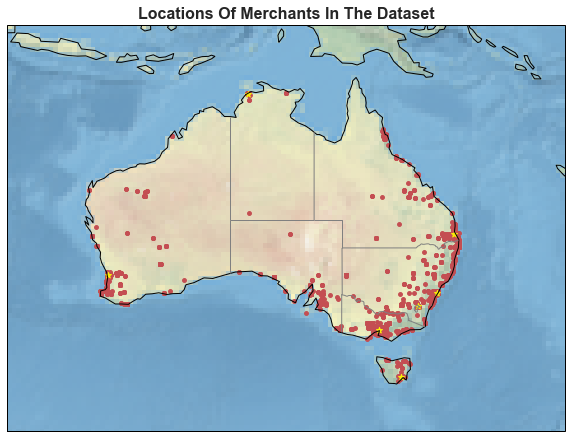

In [152]:
import cartopy.crs as ccrs
import cartopy.feature as cfeat

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())

ax.stock_img()

# Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
states_provinces = cfeat.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')

SOURCE = 'Natural Earth'
LICENSE = 'public domain'

ax.add_feature(cfeat.LAND)
ax.add_feature(cfeat.OCEAN)
ax.add_feature(cfeat.COASTLINE)
ax.add_feature(cfeat.RIVERS)
ax.add_feature(states_provinces, edgecolor='gray')

ax.set_extent([105, 165, -5, -45])

ax.set_title('Locations Of Merchants In The Dataset', fontsize=16, fontweight='bold')
ax.scatter(x_m, y_m, c='r', s=15)
ax.scatter(151.2093, -33.8688, c='yellow', marker='*', s=40, alpha=0.85) # Sydney
ax.scatter(144.9631, -37.8136, c='yellow', marker='*', s=40, alpha=0.85) # Melbourne
ax.scatter(115.8605, -31.9505, c='yellow', marker='*', s=40, alpha=0.85) # Perth
ax.scatter(130.8456, -12.4634, c='yellow', marker='*', s=40, alpha=0.85) # Darwin
ax.scatter(153.0251, -27.4698, c='yellow', marker='*', s=40, alpha=0.85) # Brisbane
ax.scatter(147.3272, -42.8821, c='yellow', marker='*', s=40, alpha=0.85) # Hobart
ax.scatter(149.1300, -35.2809, c='yellow', marker='*', s=40, alpha=0.85) # Canberra

plt.savefig('merch_trans_loc.png', dpi=300, bbox_inches='tight', transparent=True)

plt.show()

The above map shows the locations of all merchants that have made transactions with customers in the dataset. We can see that the sparcity of the merchant locations is greater than that exhibited by that in the geographic scatter plot for the customers. We can see merchants exist within rural areas of the states and not necessarily concentrated at the main cities in those states. This suggests that transactions and purchases made need not have been in person. In other words, payments may have been made online, by phone, inter-bank transaction etc. We can see the distribution in the transaction/payment method via the ```txn_description``` column.

Aggregate Balance Of Each Customer (Over Entire Period)

In [153]:
agg_bal = df.pivot_table(index='account', values='balance', aggfunc=np.mean)
mean_balance = agg_bal.describe().loc[['mean']].reset_index()
mean_balance = int(mean_balance['balance'])
agg_bal.head()

,balance
account,
ACC-1037050564,3331.424479
ACC-1056639002,46338.733837
ACC-1199531521,10162.788961
ACC-1217063613,4513.148800
ACC-1222300524,1191.291419


<Figure size 864x432 with 0 Axes>

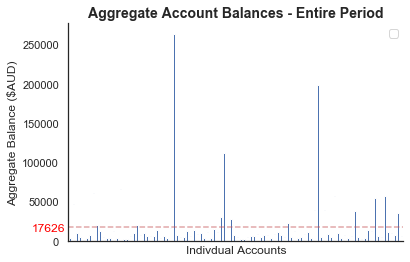

In [154]:
fig = plt.figure(figsize=(12,6))
agg_bal.plot(kind='bar')
plt.xticks([])
plt.axhline(mean_balance, c='r', linestyle='--', alpha=0.5)
plt.text(-11.5, mean_balance - 5000, "{}".format(mean_balance), color='red')
plt.ylabel("Aggregate Balance ($AUD)")
plt.xlabel("Indivdual Accounts")
plt.title("Aggregate Account Balances - Entire Period", fontsize=14, fontweight='bold')
plt.legend([])
sns.despine()

plt.show()

The above bar graph shows the individual aggregate balances of each individuals account for the whole duration (August to September). We can see that a few individuals have a total aggregate balance above 100,000 dollars and a few with balances above 50,000 dollars. However, majority of the accounts have aggregate balances that fall below or around the mean aggregate balance value of 17,626 dollars.